# pytoch tutorals

# part-1 pytorch basics & Linear Regression

In [1]:
import torch

ImportError: /home/sandeep.nagar/anaconda3/lib/python3.7/site-packages/torch/_C.cpython-37m-x86_64-linux-gnu.so: failed to map segment from shared object: Cannot allocate memory

In [ ]:
t1 =torch.tensor(10)
print(t1)

tensor(10)


In [ ]:
t2 = torch.tensor([1., 2, 3, 5])
print(t2)

tensor([1., 2., 3., 5.])


In [ ]:
t3 = torch.tensor([[5,6], [5,6]])
t3

tensor([[5, 6],
        [5, 6]])

In [ ]:
t4 = torch.tensor([[[4,6,8],[10,5,15]],[[50,6,100],[60,90,123]]])
t4

tensor([[[  4,   6,   8],
         [ 10,   5,  15]],

        [[ 50,   6, 100],
         [ 60,  90, 123]]])

In [ ]:
t1.shape

torch.Size([])

In [ ]:
t2.shape
print(t2)

tensor([1., 2., 3., 5.])


In [ ]:
x = torch.tensor(3.)
b = torch.tensor(4., requires_grad=True)
w = torch.tensor(6., requires_grad=True)

In [ ]:
# airthmatic oprations 
y = x*w + b
y

tensor(22., grad_fn=<AddBackward0>)

In [ ]:
# claculating derivatis
#y.backward()
#print(y)

In [ ]:
# display grads
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print("dy/db:", b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(3.)


In [ ]:
import numpy as np
x = np.array([[2.1,4],[3,9]])
x

array([[2.1, 4. ],
       [3. , 9. ]])

In [ ]:
y = torch.from_numpy(x)
y

tensor([[2.1000, 4.0000],
        [3.0000, 9.0000]], dtype=torch.float64)

In [ ]:
# checking data type is same or not 
x.dtype, y.dtype

(dtype('float64'), torch.float64)

In [ ]:
z = y.numpy()
z

array([[2.1, 4. ],
       [3. , 9. ]])

In [ ]:
!pip install jovian --upgrade

     |████████████████████████████████| 71kB 2.0MB/s 
  Created wheel for uuid: filename=uuid-1.30-cp36-none-any.whl size=6502 sha256=1822dfffc3735c04bd527ff8e7a3848dde46cec6cd5260dce80997c670b853e5
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built uuid


In [ ]:
import torch

# Linear Regression

In [8]:
import numpy as np
import torch

In [9]:
# input (tem[p, rainfaal, humidity)
inputs = np.array([[23, 64, 74],
                   [54, 34, 92],
                   [69, 42, 30],
                   [102, 10, 34],
                   [54, 34, 72]], dtype='float32')

In [10]:
targets = np.array([[98, 64],
                   [55, 66],
                   [49, 94],
                    [54, 35],
                    [54, 64]],  dtype='float32')

In [11]:
# converts inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets  = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 23.,  64.,  74.],
        [ 54.,  34.,  92.],
        [ 69.,  42.,  30.],
        [102.,  10.,  34.],
        [ 54.,  34.,  72.]])
tensor([[98., 64.],
        [55., 66.],
        [49., 94.],
        [54., 35.],
        [54., 64.]])


In [12]:
w = torch.randn(2, 3 , requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w,b)

tensor([[-0.3234, -0.3740, -1.3905],
        [-0.8249, -0.9731,  0.1332]], requires_grad=True) tensor([-0.0438, -0.9538], requires_grad=True)


In [13]:

def model(x):
  return x @ w.t() + b

In [14]:


# Generats predctions 
preds = model(inputs)
print(preds)

tensor([[-134.3213,  -72.3470],
        [-158.1568,  -66.3282],
        [ -79.7873,  -94.7440],
        [ -84.0540,  -90.2935],
        [-130.3460,  -68.9921]], grad_fn=<AddBackward0>)


In [15]:



print(targets)

tensor([[98., 64.],
        [55., 66.],
        [49., 94.],
        [54., 35.],
        [54., 64.]])


In [16]:
diff = targets - preds

In [17]:
def mse(t1, t2):
  diff = t1 - t2
  return torch.sum(diff * diff) / diff.numel()

In [18]:
# loss function
loss = mse(preds, targets)

In [19]:
print(loss)

tensor(27414.8379, grad_fn=<DivBackward0>)


In [20]:
# compute gradients
loss.backward()

In [21]:
print(w, w.grad)

tensor([[-0.3234, -0.3740, -1.3905],
        [-0.8249, -0.9731,  0.1332]], requires_grad=True) tensor([[ -9955.2744,  -7034.6523, -11726.5127],
        [ -8653.3086,  -5385.4551,  -8352.3193]])


In [22]:
print(b, b.grad)

tensor([-0.0438, -0.9538], requires_grad=True) tensor([-179.3331, -143.1409])


In [23]:
w.grad.zero_()
b.grad.zero_()
print(w.grad, b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]]) tensor([0., 0.])


In [24]:
preds = model(inputs)

In [25]:
print(preds)

tensor([[-134.3213,  -72.3470],
        [-158.1568,  -66.3282],
        [ -79.7873,  -94.7440],
        [ -84.0540,  -90.2935],
        [-130.3460,  -68.9921]], grad_fn=<AddBackward0>)


In [26]:
loss  = mse(preds, targets)
print(loss)

tensor(27414.8379, grad_fn=<DivBackward0>)


In [27]:

loss.backward()
print(w.grad, b.grad)

tensor([[ -9955.2744,  -7034.6523, -11726.5127],
        [ -8653.3086,  -5385.4551,  -8352.3193]]) tensor([-179.3331, -143.1409])


In [28]:
# adjust weights & reset gradients
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()


In [29]:
print(w,b)

tensor([[-0.2239, -0.3037, -1.2733],
        [-0.7383, -0.9192,  0.2167]], requires_grad=True) tensor([-0.0420, -0.9524], requires_grad=True)


In [30]:
# claculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(23017.0684, grad_fn=<DivBackward0>)


In [31]:
# train 
epochs = 10000
for i in range(0,epochs):
  preds = model(inputs)
  loss = mse(preds, targets)
  loss.backward()
  # if i /10 :
  #   print(loss)
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()
 

In [32]:
# calculate loss 
preds = model(inputs)
loss  = mse(preds, targets)
print(loss)

tensor(173.0457, grad_fn=<DivBackward0>)


In [33]:
print(preds)
print(targets)

tensor([[83.1185, 81.1966],
        [62.8786, 56.6803],
        [64.1642, 76.4038],
        [40.0052, 51.1740],
        [59.5180, 57.9282]], grad_fn=<AddBackward0>)
tensor([[98., 64.],
        [55., 66.],
        [49., 94.],
        [54., 35.],
        [54., 64.]])


In [34]:
# Liear Regressing using PyTorch built-ins

In [35]:
import torch.nn as nn


In [36]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [37]:
##  Load dataset 
from torch.utils.data import TensorDataset


In [38]:
# defin dataset 
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [39]:
from torch.utils.data import DataLoader

In [40]:
# define data loader 
batch_size = 5
train_d1 = DataLoader(train_ds, batch_size, shuffle=True)

In [41]:
for xb, yb in train_d1:
  print(xb)
  print(yb)
  #break

tensor([[91., 88., 64.],
        [73., 67., 43.],
        [91., 88., 64.],
        [69., 96., 70.],
        [73., 67., 43.]])
tensor([[ 81., 101.],
        [ 56.,  70.],
        [ 81., 101.],
        [103., 119.],
        [ 56.,  70.]])
tensor([[ 69.,  96.,  70.],
        [102.,  43.,  37.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.]])
tensor([[103., 119.],
        [ 22.,  37.],
        [ 56.,  70.],
        [ 81., 101.],
        [ 22.,  37.]])
tensor([[ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 87., 134.,  58.],
        [ 87., 134.,  58.]])
tensor([[119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [119., 133.],
        [119., 133.]])


In [42]:
# define model 
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.0630, -0.3968,  0.0582],
        [-0.0762, -0.0788,  0.1466]], requires_grad=True)
Parameter containing:
tensor([0.3633, 0.1505], requires_grad=True)


In [43]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0630, -0.3968,  0.0582],
         [-0.0762, -0.0788,  0.1466]], requires_grad=True),
 Parameter containing:
 tensor([0.3633, 0.1505], requires_grad=True)]

In [44]:
preds = model(inputs)

In [45]:
preds

tensor([[-19.1181,  -4.3877],
        [-25.0942,  -4.3358],
        [-43.9469,  -8.5373],
        [ -8.1169,  -5.5836],
        [-29.3058,  -2.4115],
        [-19.1181,  -4.3877],
        [-25.0942,  -4.3358],
        [-43.9469,  -8.5373],
        [ -8.1169,  -5.5836],
        [-29.3058,  -2.4115],
        [-19.1181,  -4.3877],
        [-25.0942,  -4.3358],
        [-43.9469,  -8.5373],
        [ -8.1169,  -5.5836],
        [-29.3058,  -2.4115]], grad_fn=<AddmmBackward>)

In [46]:
# loss function 
import torch.nn.functional as F
loss_fn = F.mse_loss
loss
#  ?F.mse_loss

tensor(173.0457, grad_fn=<DivBackward0>)

In [47]:
#  define optmizer 
opt = torch.optim.SGD(model.parameters(), lr=1e-5)
print(opt)

SGD (
Parameter Group 0
    dampening: 0
    lr: 1e-05
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [48]:
# train the model 

def fit(num_epochs, model, loss_fn, opt):
  # repeat for no of epochs
  for epoch in range(num_epochs):
      # train with bacthes of data
    for xb,yb, in train_d1:
      # 1 generats predctions
      pred = model(xb)
      # 2 calculate loss
      loss = loss_fn(pred, yb)
      # 3 compute gradients
      loss.backward()
      # 4 Updates parameters using gradients 
      opt.step()
      # 5 reset the gradients to zero 
      opt.zero_grad()
    # print progress
    if (epoch+1) % 100 == 0:
          print('Epoch [{}/{}], loss: {:.4f}'.format(epoch+1, num_epochs, loss.item())) 

In [49]:
train = fit(1000, model, loss_fn, opt)

Epoch [100/1000], loss: 11.3521
Epoch [200/1000], loss: 6.8472
Epoch [300/1000], loss: 2.4816
Epoch [400/1000], loss: 2.0702
Epoch [500/1000], loss: 1.2110
Epoch [600/1000], loss: 1.5401
Epoch [700/1000], loss: 0.7143
Epoch [800/1000], loss: 0.6066
Epoch [900/1000], loss: 0.5696
Epoch [1000/1000], loss: 0.6482


In [50]:
preds = model(inputs)
preds

tensor([[ 57.2472,  70.3510],
        [ 82.0934, 100.4780],
        [118.8893, 133.3024],
        [ 21.1341,  37.1091],
        [101.7588, 118.7807],
        [ 57.2472,  70.3510],
        [ 82.0934, 100.4780],
        [118.8893, 133.3024],
        [ 21.1341,  37.1091],
        [101.7588, 118.7807],
        [ 57.2472,  70.3510],
        [ 82.0934, 100.4780],
        [118.8893, 133.3024],
        [ 21.1341,  37.1091],
        [101.7588, 118.7807]], grad_fn=<AddmmBackward>)

In [51]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# Logistic Regression

In [52]:
import torch 
import torchvision
from torchvision.datasets import MNIST

In [53]:
dataset  = MNIST(root='data/', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [54]:
len(dataset)

60000

In [55]:
# test dataset 

test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [56]:


# test
dataset[20001]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F77B1374630>, 9)

In [57]:





import matplotlib.pyplot as plt
%matplotlib inline

Label 9


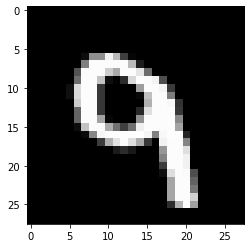

In [58]:
image, label = dataset[20001]
plt.imshow(image, cmap ='gray')
print('Label', label)

In [59]:

import torchvision.transforms as transform

In [60]:

# mnist dataset as tensors
dataset = MNIST(root='data/', 
                train=True, 
                transform=transform.ToTensor())

In [61]:
img_tensor, label = dataset[20202]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 9


In [62]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.9922, 0.9922, 0.9294, 0.6431, 0.2157],
         [0.9922, 0.4275, 0.0471, 0.0000, 0.0000],
         [0.2549, 0.0000, 0.0000, 0.0000, 0.0431],
         [0.0000, 0.0000, 0.0000, 0.1765, 0.8392],
         [0.0000, 0.1529, 0.4627, 0.9059, 0.9961]]])
tensor(1.) tensor(0.)


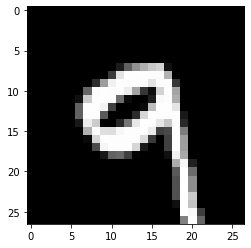

In [63]:
# plot the image by passing in the matrix 28x28
plt.imshow(img_tensor[0, 0:27, 0:27], cmap='gray')

## training , validation and test

In [149]:
import numpy as np

n = 60000
val_pct = 0.1
n_val = int(val_pct*n)
n_val
idxs = np.random.permutation(n)
idxs

array([28255,  4093, 38821, ..., 12037, 36117, 43570])

In [150]:
import numpy as np

def split_indices(n, val_pct):

  # determining  size of validation 
  n_val = int(val_pct*n)
  # create random permutation of 0 to n-1
  idxs = np.random.permutation(n)
  # pick first n_val indices for validation set
  return idxs[n_val:], idxs[:n_val]
  

In [151]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [152]:
print(len(train_indices), len(val_indices))
print('Sample val indices', val_indices[:20])

48000 12000
Sample val indices [17957 17767 28180 54941 13116 34603 31379 13515 25206 36985 33106 16788
  5011 28106  1118 24455 51521 49851 21563 32874]


In [153]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [154]:
batch_size = 500

# traning sampler and data loader 
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler=train_sampler)
# Validation sampler and dataloader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler= val_sampler)


## Model

In [155]:
import torch.nn as nn
input_size = 28*28
num_classes = 10

# Logistic regression model 

model  = nn.Linear(input_size, num_classes)
print(model)

Linear(in_features=784, out_features=10, bias=True)


In [156]:

print(model.weight.shape)
model.bias

torch.Size([10, 784])


Parameter containing:
tensor([-0.0229,  0.0086, -0.0176, -0.0086, -0.0210,  0.0284,  0.0052, -0.0226,
         0.0209,  0.0048], requires_grad=True)

In [157]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([0, 8, 5, 0, 8, 3, 4, 8, 1, 7, 6, 0, 1, 4, 1, 1, 0, 0, 8, 2, 9, 8, 7, 0,
        6, 4, 6, 1, 4, 9, 8, 0, 3, 1, 6, 5, 6, 4, 4, 9, 6, 6, 9, 6, 2, 2, 8, 9,
        0, 2, 4, 7, 2, 1, 1, 0, 7, 7, 4, 1, 3, 5, 1, 0, 4, 3, 6, 9, 0, 5, 9, 3,
        6, 2, 6, 8, 7, 7, 2, 9, 5, 2, 5, 1, 2, 1, 7, 0, 6, 6, 0, 3, 8, 2, 6, 4,
        3, 8, 1, 0, 7, 3, 9, 3, 0, 2, 3, 0, 0, 7, 4, 8, 3, 9, 9, 8, 9, 5, 9, 6,
        0, 2, 0, 5, 4, 8, 1, 0, 4, 4, 0, 4, 1, 5, 3, 5, 0, 0, 4, 6, 0, 5, 4, 3,
        0, 4, 4, 6, 2, 8, 1, 3, 7, 2, 8, 0, 0, 9, 9, 6, 0, 9, 4, 5, 3, 5, 6, 3,
        5, 9, 1, 9, 5, 3, 8, 3, 3, 5, 6, 2, 8, 7, 7, 7, 6, 8, 6, 0, 1, 5, 2, 2,
        9, 1, 6, 3, 6, 1, 6, 7, 4, 7, 2, 5, 5, 1, 3, 3, 7, 0, 5, 1, 8, 3, 1, 2,
        2, 9, 4, 5, 9, 1, 1, 2, 5, 0, 0, 3, 0, 4, 3, 7, 8, 3, 2, 0, 5, 3, 6, 8,
        4, 8, 8, 2, 0, 4, 6, 8, 2, 4, 0, 5, 7, 1, 1, 3, 6, 4, 3, 6, 9, 9, 4, 3,
        9, 1, 6, 4, 1, 0, 2, 8, 6, 1, 1, 7, 7, 5, 7, 4, 2, 9, 5, 4, 5, 2, 3, 0,
        7, 6, 4, 4, 7, 3, 6, 0, 5, 1, 7,

RuntimeError: ignored

In [158]:
class MinstModel(nn.Module):
  def __init__(self):
    super().__init__()  # constructer
    self.linear = nn.Linear(input_size, num_classes)
    # instance of current model
  def forward(self, xb):
    xb = xb.reshape(-1, 784)  # why -1, pytorch can calculate automaticaly, allow as to generalize the model 
    out = self.linear(xb)
    return out

model = MinstModel()
#print(model)


In [159]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0320, -0.0349,  0.0125,  ..., -0.0256,  0.0004,  0.0035],
         [-0.0115,  0.0342, -0.0034,  ...,  0.0186, -0.0076, -0.0356],
         [ 0.0049, -0.0140, -0.0130,  ...,  0.0197, -0.0314, -0.0150],
         ...,
         [ 0.0191, -0.0014,  0.0032,  ...,  0.0335, -0.0242, -0.0071],
         [ 0.0220,  0.0153, -0.0354,  ...,  0.0086, -0.0195,  0.0345],
         [-0.0169, -0.0127,  0.0256,  ..., -0.0048,  0.0174, -0.0041]],
        requires_grad=True), Parameter containing:
 tensor([-0.0021,  0.0329, -0.0057,  0.0251, -0.0046, -0.0017,  0.0193, -0.0070,
         -0.0335,  0.0055], requires_grad=True)]

In [160]:
# .paramters will contains all the parameters 

In [161]:
for images, labels in train_loader:
  outputs = model(images)
  break

print('output.shape :', outputs.shape)
print('Samples outputs :\n', outputs[:2].data)

output.shape : torch.Size([500, 10])
Samples outputs :
 tensor([[-1.1244e-01,  2.3562e-04, -2.4873e-02, -7.5428e-02,  1.2270e-01,
          6.4293e-04, -9.9443e-02,  1.6268e-02,  1.1126e-01,  4.6700e-02],
        [-1.6913e-01, -2.6381e-01,  4.6075e-01,  5.7105e-02, -1.1640e-01,
          1.5116e-01, -1.3600e-01,  1.3006e-01,  1.7256e-02, -3.2824e-01]])


In [162]:
import torch.nn.functional as F

In [163]:
# apply Softmax for each output row 
probs  = F.softmax(outputs, dim=1)

# look at sample probabilities 
print('Sample probabilities :\n', probs[:2].data)

# add up to probabilities of an output row
print('Sum: ', torch.sum(probs[0]).item())

Sample probabilities :
 tensor([[0.0892, 0.0999, 0.0974, 0.0926, 0.1129, 0.0999, 0.0904, 0.1015, 0.1116,
         0.1046],
        [0.0839, 0.0764, 0.1576, 0.1053, 0.0885, 0.1156, 0.0868, 0.1132, 0.1011,
         0.0716]])
Sum:  1.0


In [164]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 2, 8, 5, 5, 2, 2, 2, 2, 2, 5, 8, 5, 5, 5, 5, 8, 5, 6, 5, 8, 5, 2, 2,
        4, 8, 5, 5, 4, 5, 2, 4, 5, 2, 6, 8, 7, 4, 5, 5, 2, 6, 6, 8, 5, 5, 8, 8,
        5, 5, 8, 4, 2, 4, 2, 5, 6, 8, 8, 9, 2, 5, 5, 5, 5, 2, 2, 8, 2, 2, 2, 5,
        4, 8, 8, 2, 8, 8, 2, 2, 7, 8, 2, 8, 5, 2, 8, 6, 5, 8, 2, 5, 8, 2, 8, 7,
        8, 5, 2, 2, 5, 2, 2, 0, 8, 5, 6, 8, 5, 3, 5, 5, 5, 8, 7, 2, 0, 5, 2, 8,
        2, 6, 4, 6, 5, 5, 8, 8, 2, 2, 2, 2, 8, 8, 5, 8, 2, 8, 2, 5, 8, 8, 2, 8,
        4, 5, 2, 8, 8, 5, 2, 2, 5, 8, 2, 6, 2, 4, 2, 6, 8, 5, 4, 8, 8, 5, 8, 4,
        8, 8, 8, 8, 8, 8, 8, 5, 5, 2, 8, 5, 8, 5, 2, 2, 6, 2, 2, 5, 8, 8, 5, 4,
        2, 5, 2, 5, 8, 2, 4, 6, 7, 8, 8, 5, 8, 8, 2, 8, 5, 8, 1, 6, 5, 8, 8, 5,
        8, 8, 8, 5, 4, 8, 5, 5, 2, 2, 5, 8, 8, 5, 5, 5, 2, 8, 8, 5, 8, 2, 5, 8,
        4, 2, 8, 8, 5, 2, 8, 2, 5, 5, 5, 8, 8, 2, 8, 8, 2, 6, 8, 8, 8, 5, 5, 8,
        4, 8, 8, 5, 8, 4, 2, 6, 4, 2, 8, 5, 5, 2, 5, 5, 2, 8, 4, 5, 2, 8, 6, 8,
        2, 2, 5, 2, 2, 8, 8, 2, 2, 8, 5,

In [165]:
labels

tensor([1, 8, 7, 5, 1, 2, 8, 2, 2, 0, 6, 7, 6, 7, 3, 4, 8, 6, 5, 8, 7, 0, 2, 8,
        1, 7, 4, 7, 1, 5, 3, 5, 5, 6, 7, 1, 1, 3, 5, 4, 0, 7, 9, 9, 9, 4, 4, 2,
        8, 7, 1, 8, 6, 1, 2, 0, 4, 1, 7, 5, 3, 2, 4, 4, 2, 0, 0, 1, 8, 4, 3, 2,
        3, 3, 0, 6, 6, 1, 6, 3, 5, 3, 6, 8, 4, 6, 6, 1, 9, 7, 3, 8, 4, 6, 2, 1,
        7, 5, 2, 6, 2, 2, 6, 3, 1, 2, 7, 4, 1, 4, 5, 3, 5, 7, 1, 3, 3, 5, 6, 9,
        2, 1, 1, 1, 9, 7, 2, 3, 7, 2, 0, 2, 4, 7, 4, 7, 7, 8, 3, 4, 1, 1, 0, 5,
        1, 2, 8, 2, 2, 9, 3, 6, 3, 3, 3, 1, 8, 1, 6, 2, 7, 7, 1, 8, 9, 2, 8, 1,
        5, 5, 7, 9, 9, 2, 7, 2, 3, 8, 7, 2, 8, 2, 6, 6, 5, 5, 5, 4, 4, 0, 5, 1,
        6, 8, 2, 9, 2, 3, 1, 7, 1, 7, 9, 4, 9, 2, 5, 3, 4, 1, 1, 9, 8, 7, 3, 4,
        7, 8, 7, 0, 2, 4, 5, 0, 3, 3, 3, 9, 8, 4, 8, 3, 6, 9, 7, 4, 3, 9, 9, 9,
        1, 6, 7, 2, 7, 3, 9, 0, 9, 8, 1, 6, 8, 6, 9, 7, 5, 5, 1, 1, 0, 4, 1, 7,
        1, 8, 4, 7, 9, 1, 3, 4, 1, 0, 6, 2, 4, 0, 4, 7, 8, 4, 1, 0, 2, 9, 9, 7,
        6, 0, 0, 8, 0, 6, 8, 0, 2, 3, 8,

## Evaluation matric and loss function

In [166]:
def accuracy(l1, l2):
  return torch.sum(l1 == l2).item() / len(l1)
  

In [167]:
accuracy(preds, labels)

0.108

In [168]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3159, grad_fn=<NllLossBackward>)


In [169]:
learning_rate = 0.001
optmizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Traning the Model

In [170]:
def loss_batch(model, loss_fn, xb, yb, opt=None, metric=None):
    # calculate the loss
    preds = model(xb)
    loss = loss_fn(preds, yb)

    if opt is not None:
        # compute gradient
        loss.backward()

        # update the parameters 
        opt.step()

        # reset gradients
        opt.zero_grad()
    metric_result = None
    if metric is not None:
        # compute the metric

        metric_result = metric(preds, yb)
    return loss.item(), len(xb), metric_result



In [171]:
def evaluate(model, loss_fn, valid_d1, metric=None):
  with torch.no_grad():
      # pass each batch through the model
      results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb, yb in valid_d1]
      # Seprate losses, counts and matrices
      losses, nums, metrics = zip(*results)

      # Totel size of the dataset
      total = np.sum(nums)

      # Avg. loss across batches
      avg_loss = np.sum(np.multiply(losses, nums)) / total
      avg_metric = None
      if metric is not None:
          # Avg. of metric across batches
          avg_metric = np.sum(np.multiply(metrics, nums)) / total
  return avg_loss, total, avg_metric

In [172]:
 def accuracy(outputs, labels):
   _, preds = torch.max(outputs, dim=1)
   return torch.sum(preds == labels).item() / len(preds)


In [173]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss : {:.4f}, Accuracy: {:.4f} '.format(val_loss,val_acc))

Loss : 2.3236, Accuracy: 0.0979 


In [174]:
def fit(epochs, model, loss_fn, opt, train_d1, valid_d1, metric):
    for epoch in range(epochs):
        # Traning
        for xb, yb, in train_d1:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)
        
        # Evaluation
        result = evaluate(model, loss_fn, valid_d1, metric)
        val_loss, total, val_metric = result

        # Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f} '.format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f} '.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))



In [175]:
model = MinstModel()
optimizer =  torch.optim.SGD(model.parameters(), lr=learning_rate)

In [176]:
fit(25, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/25], Loss: 2.2359, accuracy: 0.2172 
Epoch [2/25], Loss: 2.1405, accuracy: 0.4000 
Epoch [3/25], Loss: 2.0528, accuracy: 0.5162 
Epoch [4/25], Loss: 1.9716, accuracy: 0.5903 
Epoch [5/25], Loss: 1.8963, accuracy: 0.6373 
Epoch [6/25], Loss: 1.8263, accuracy: 0.6726 
Epoch [7/25], Loss: 1.7613, accuracy: 0.6957 
Epoch [8/25], Loss: 1.7008, accuracy: 0.7117 
Epoch [9/25], Loss: 1.6445, accuracy: 0.7267 
Epoch [10/25], Loss: 1.5921, accuracy: 0.7374 
Epoch [11/25], Loss: 1.5434, accuracy: 0.7466 
Epoch [12/25], Loss: 1.4979, accuracy: 0.7538 
Epoch [13/25], Loss: 1.4556, accuracy: 0.7606 
Epoch [14/25], Loss: 1.4160, accuracy: 0.7656 
Epoch [15/25], Loss: 1.3791, accuracy: 0.7706 
Epoch [16/25], Loss: 1.3445, accuracy: 0.7748 
Epoch [17/25], Loss: 1.3121, accuracy: 0.7795 
Epoch [18/25], Loss: 1.2817, accuracy: 0.7830 
Epoch [19/25], Loss: 1.2532, accuracy: 0.7867 
Epoch [20/25], Loss: 1.2264, accuracy: 0.7889 
Epoch [21/25], Loss: 1.2011, accuracy: 0.7913 
Epoch [22/25], Loss: 1

In [177]:
test_dataset = MNIST(root='data/', 
                train=False, 
                transform=transform.ToTensor())

test_loader  = DataLoader(test_dataset, batch_size=200)
for images, labels in test_loader:
  outputs_test = model(images)
  break

print('output.shape :', outputs.shape)
print('Samples outputs :\n', outputs[:2].data)

output.shape : torch.Size([500, 10])
Samples outputs :
 tensor([[-1.1244e-01,  2.3562e-04, -2.4873e-02, -7.5428e-02,  1.2270e-01,
          6.4293e-04, -9.9443e-02,  1.6268e-02,  1.1126e-01,  4.6700e-02],
        [-1.6913e-01, -2.6381e-01,  4.6075e-01,  5.7105e-02, -1.1640e-01,
          1.5116e-01, -1.3600e-01,  1.3006e-01,  1.7256e-02, -3.2824e-01]])


Shape: torch.Size([1, 28, 28])
Label: 7


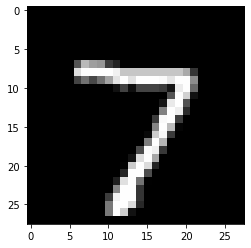

In [178]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [182]:
#test_loader  = DataLoader(test_dataset, batch_size=200)

test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy )
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc ))

Loss: 1.0876, Accuracy: 0.8203


## Saving the model

In [185]:
torch.save(model.state_dict(), 'mnist-logostic.pth')   # atteched trained model
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0245, -0.0118,  0.0236,  ...,  0.0149, -0.0163, -0.0192],
                      [-0.0263, -0.0124, -0.0336,  ..., -0.0027, -0.0071, -0.0275],
                      [-0.0084,  0.0140, -0.0272,  ..., -0.0241,  0.0233, -0.0094],
                      ...,
                      [ 0.0323,  0.0029,  0.0082,  ..., -0.0336, -0.0323, -0.0313],
                      [-0.0291, -0.0257, -0.0274,  ..., -0.0273, -0.0140,  0.0352],
                      [ 0.0086,  0.0208, -0.0157,  ..., -0.0143, -0.0333, -0.0296]])),
             ('linear.bias',
              tensor([-0.0450,  0.0771,  0.0118, -0.0154,  0.0023,  0.0448,  0.0022,  0.0214,
                      -0.0378,  0.0277]))])

# Traning Deep Neural Networks on a GPU

In [1]:
import torch
import numpy as np
import torchvision
import torch.nn.functional as F
import torch.nn as nn
from torchvision.datasets import MNIST
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

ImportError: /home/sandeep.nagar/anaconda3/lib/python3.7/site-packages/torch/_C.cpython-37m-x86_64-linux-gnu.so: failed to map segment from shared object: Cannot allocate memory

In [96]:
dataset  = MNIST(root='data/',
                 download=True,
                 transform=ToTensor())

# dataset  = CIFAR10(root='data/',
#                  download=True,
#                  transform=ToTensor())


In [97]:
def split_indices(n, val_pct):
    # determine size of validation set 
    n_val = int(val_pct*n)

    # creat random permutation od 0 to n-1
    idxs = np.random.permutation(n)

    # pick first n_val indices for validation set 
    return idxs[n_val:], idxs[:n_val]

In [98]:

train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)
print(len(train_indices), len(val_indices))
print('sample_val indices:', val_indices[:20])

48000 12000
sample_val indices: [40200 51057 29077  2056 42328 40773 10355 41232 19418  6919 45635 39069
 45208 26213 31660 42243 45831 23933 54721 11304]


In [99]:
batch_size = 500


# Traning sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_d1 = DataLoader(dataset,
                      batch_size,
                       sampler = train_sampler)


#  validation sampler and data loader 
valid_sampler = SubsetRandomSampler(val_indices)
valid_d1 = DataLoader(dataset,
                      batch_size,
                       sampler = valid_sampler)


## Model

In [100]:
class MnistModel(nn.Module):
    # feed foward nn with 1 hidden layer
    def __init__(self, in_size, hidden_size_1, hidden_size_2, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size_1)

        self.linear11 = nn.Linear(hidden_size_1, hidden_size_2)

        # output layer
        self.linear2 = nn.Linear(hidden_size_2, out_size)

    def forward(self, xb):
        # Flaten the imahe tensor
        xb = xb.view(xb.size(0), -1)

        # get intermediat outputs using hidden layer
        out = self.linear1(xb)
        out = self.linear11(out)

        # apply activation function   or ignoring the negatives values
        out = F.relu(out)

        # Get predctions using the output layer
        out = self.linear2(out)
        return out



In [101]:
for xb, yb in train_d1:
  xb= xb.view(xb.size(0), -1)
  print(xb.shape)
  break

torch.Size([500, 784])


In [102]:
input_size = 784
num_classes = 10

model = MnistModel(input_size, hidden_size_1=128,
                   hidden_size_2=32, 
                   out_size=num_classes)

In [103]:
print(model)

MnistModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear11): Linear(in_features=128, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)


In [104]:
for t in model.parameters():
    print(t.shape)

torch.Size([128, 784])
torch.Size([128])
torch.Size([32, 128])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [105]:
print(model.parameters)

<bound method Module.parameters of MnistModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear11): Linear(in_features=128, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)>


In [106]:
for images, labels in train_d1:
    print(images.shape)
    output = model(images)
    loss = F.cross_entropy(output, labels)
    print('Loss:', loss.item())
    break


print('output.shapes:', output.shape)
print('Sample outputs:', output[:2].data)

torch.Size([500, 1, 28, 28])
Loss: 2.30118727684021
output.shapes: torch.Size([500, 10])
Sample outputs: tensor([[ 0.0183, -0.1018, -0.0545,  0.1312,  0.1671,  0.1669,  0.1821, -0.0837,
          0.0473, -0.0772],
        [ 0.0361, -0.0641, -0.1414,  0.1423,  0.1995,  0.2358,  0.1622, -0.0810,
         -0.0176, -0.0879]])


## Using GPU

In [107]:
torch.cuda.is_available()


False

In [108]:
def get_default_device():
    # pic GPU if avaliable , else cpu
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu') 



In [109]:
device  = get_default_device()
device

device(type='cpu')

In [110]:
def to_device(data, device):
    # move tensor to chossen device 
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data] 
    return data.to(device, non_blocking=True)

In [111]:
for images, labels in train_d1:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([500, 1, 28, 28])
cpu


In [112]:
class DeviceDataLoader1():
  # wrap a data loader to move data to a device
  def __init__(self, d1, device):
    self.d1 = d1
    self.device = device

  def __iter__(self):
    # yield a batch of data after moving to device 
    for b in self.d1:
      yield to_device(b, self.device)

  def __len__(self):
    # no of batches 
    return len(self.d1)

In [113]:
train_d1 = DeviceDataLoader1(train_d1, device)

valid_d1 = DeviceDataLoader1(valid_d1, device)

In [114]:
for xb, yb in valid_d1:
  print('xb.device', xb.device)
  print('yb', yb)
  break

xb.device cpu
yb tensor([3, 6, 9, 6, 6, 1, 1, 6, 4, 6, 7, 4, 3, 6, 4, 0, 0, 5, 4, 4, 1, 1, 1, 7,
        5, 9, 2, 6, 7, 6, 1, 9, 9, 9, 1, 0, 8, 6, 9, 2, 4, 3, 5, 0, 9, 7, 8, 7,
        9, 4, 2, 4, 9, 0, 9, 1, 1, 5, 9, 2, 1, 9, 2, 7, 9, 6, 3, 2, 0, 8, 5, 4,
        1, 7, 5, 4, 4, 6, 9, 0, 2, 3, 7, 3, 0, 3, 1, 9, 6, 2, 1, 5, 4, 4, 4, 5,
        8, 3, 8, 0, 5, 2, 0, 3, 5, 0, 2, 4, 5, 2, 2, 9, 0, 4, 2, 9, 1, 1, 6, 0,
        0, 6, 6, 9, 5, 2, 3, 9, 2, 3, 0, 2, 5, 6, 3, 5, 7, 8, 6, 0, 6, 4, 0, 0,
        6, 5, 4, 2, 6, 1, 3, 8, 9, 1, 0, 7, 8, 9, 9, 1, 7, 7, 9, 8, 8, 6, 6, 6,
        4, 0, 6, 6, 7, 1, 0, 4, 9, 8, 0, 3, 0, 2, 3, 0, 1, 7, 4, 1, 4, 2, 8, 0,
        6, 0, 5, 3, 1, 8, 4, 5, 7, 2, 8, 8, 5, 0, 3, 3, 5, 6, 4, 7, 4, 7, 0, 9,
        9, 5, 6, 2, 1, 0, 9, 2, 3, 7, 0, 7, 1, 8, 1, 2, 6, 6, 2, 5, 7, 8, 0, 5,
        6, 9, 1, 3, 1, 8, 0, 9, 3, 7, 3, 2, 1, 5, 7, 9, 2, 5, 1, 0, 9, 0, 7, 7,
        2, 8, 0, 2, 4, 6, 7, 6, 4, 6, 0, 5, 8, 3, 3, 0, 0, 5, 0, 7, 9, 0, 4, 8,
        6, 4, 9, 3, 1, 

## Traning 

In [115]:
def loss_batch(model, loss_fn, xb, yb, opt=None, metric=None):
    # genertes predctions
    preds = model(xb)

    # calculate loss
    loss = loss_fn(preds, yb)

    if opt is not None:
        # compute gradients
        loss.backward()

        # update parameters
        opt.step()

        # reset gradients
        opt.zero_grad()

    metric_result = None

    if metric is not None:
        # compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result



In [116]:
def evaluate(model, loss_fn, valid_d1, metric=None):
  with torch.no_grad():
    # pass each batch through the model 
    results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                for xb, yb in valid_d1]

    # seprate losses , counts, metrics
    losses, nums, metrics = zip(*results)

    # total size of the dataset
    total = np.sum(nums)

    # Avg. loss across batches
    avg_loss = np.sum(np.multiply(losses, nums)) / total
    avg_metric = None
    if metric is not None:
      # Avg. of metric accross batches
      avg_metric = np.sum(np.multiply(metrics, nums)) / total

  return avg_loss, total, avg_metric

In [117]:
def fit(epochs, lr, model, loss_fn, train_d1, valid_d1, metric=None, opt_fn=None ):
    losses, metrics = [], []
    if opt_fn is None: opt_fn = torch.optim.SGD
    opt = torch.optim.SGD(model.parameters(), lr)

    for epoch in range(epochs):
        # rtraning 
        for xb, yb in train_d1:
            loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation 
        results  = evaluate(model, loss_fn, valid_d1, metric)
        val_loss, total, val_metric = results

        # record the loss and metric
        losses.append(val_loss)
        metrics.append(val_metric)

        # print progress 
        if metric is None:
            print('epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))
        else:
          print('epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

    return losses, metrics


In [118]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [119]:
#  model (on GPU)
model = MnistModel(input_size, hidden_size_1=64, hidden_size_2=32, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=64, bias=True)
  (linear11): Linear(in_features=64, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [120]:

val_loss, total, val_acc = evaluate(model, F.cross_entropy, 
                                    valid_d1, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.2983, Accuracy: 0.0845


In [122]:
losses, metric1 = fit(20, 0.01, model, F.cross_entropy, train_d1, valid_d1, accuracy)

epoch [1/20], Loss: 1.9025, accuracy: 0.5628
epoch [2/20], Loss: 1.6772, accuracy: 0.6408
epoch [3/20], Loss: 1.3985, accuracy: 0.7087
epoch [4/20], Loss: 1.1386, accuracy: 0.7617
epoch [5/20], Loss: 0.9469, accuracy: 0.7853
epoch [6/20], Loss: 0.8152, accuracy: 0.8062
epoch [7/20], Loss: 0.7238, accuracy: 0.8196
epoch [8/20], Loss: 0.6572, accuracy: 0.8343
epoch [9/20], Loss: 0.6075, accuracy: 0.8433
epoch [10/20], Loss: 0.5689, accuracy: 0.8509
epoch [11/20], Loss: 0.5378, accuracy: 0.8582
epoch [12/20], Loss: 0.5130, accuracy: 0.8623
epoch [13/20], Loss: 0.4922, accuracy: 0.8669
epoch [14/20], Loss: 0.4745, accuracy: 0.8714
epoch [15/20], Loss: 0.4600, accuracy: 0.8742
epoch [16/20], Loss: 0.4471, accuracy: 0.8761
epoch [17/20], Loss: 0.4360, accuracy: 0.8783
epoch [18/20], Loss: 0.4267, accuracy: 0.8795
epoch [19/20], Loss: 0.4183, accuracy: 0.8819
epoch [20/20], Loss: 0.4102, accuracy: 0.8838


# Image classification using CNN(CIFAR10)

In [4]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

In [5]:
##  Download dataset 
dataset_url = "http://files.fast.ai/data/cifar10.tgz"
download_url(dataset_url, '.')

In [8]:

# extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path='./data')

In [10]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'train', 'labels.txt']
['bird', 'ship', 'automobile', 'deer', 'airplane', 'truck', 'cat', 'dog', 'horse', 'frog']


In [14]:
airplane_files = os.listdir(data_dir + "/train/airplane" )
print('No of test exaples for ship:', len(airplane_files))
print(airplane_files[:50])

No of test exaples for ship: 5000
['37761_airplane.png', '29980_airplane.png', '35414_airplane.png', '25810_airplane.png', '37646_airplane.png', '1755_airplane.png', '6240_airplane.png', '31757_airplane.png', '21881_airplane.png', '43479_airplane.png', '24791_airplane.png', '45845_airplane.png', '46990_airplane.png', '23297_airplane.png', '16219_airplane.png', '15000_airplane.png', '23796_airplane.png', '28828_airplane.png', '29844_airplane.png', '49498_airplane.png', '22249_airplane.png', '19804_airplane.png', '32683_airplane.png', '46523_airplane.png', '5529_airplane.png', '48663_airplane.png', '41152_airplane.png', '11305_airplane.png', '26744_airplane.png', '16912_airplane.png', '41745_airplane.png', '11100_airplane.png', '4387_airplane.png', '11689_airplane.png', '42573_airplane.png', '21360_airplane.png', '29295_airplane.png', '36363_airplane.png', '26416_airplane.png', '4906_airplane.png', '42984_airplane.png', '5828_airplane.png', '11775_airplane.png', '37165_airplane.png', '27

In [15]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [21]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())


In [26]:
img, labels = dataset[5999]
print(img.shape, labels)
img

torch.Size([3, 32, 32]) 1


tensor([[[0.5373, 0.5843, 0.5765,  ..., 0.9804, 0.9843, 0.9412],
         [0.5176, 0.3451, 0.5020,  ..., 0.9804, 0.9843, 0.9059],
         [0.4824, 0.1765, 0.4157,  ..., 0.9843, 0.9882, 0.9216],
         ...,
         [0.1490, 0.1765, 0.1765,  ..., 0.0706, 0.0706, 0.0902],
         [0.0902, 0.0902, 0.0588,  ..., 0.1098, 0.1843, 0.2196],
         [0.0431, 0.0275, 0.0039,  ..., 0.3098, 0.3176, 0.2471]],

        [[0.5804, 0.6314, 0.6196,  ..., 0.9882, 0.9843, 0.9333],
         [0.5686, 0.3804, 0.5294,  ..., 0.9843, 0.9804, 0.8980],
         [0.5412, 0.2118, 0.4314,  ..., 0.9843, 0.9843, 0.9098],
         ...,
         [0.1922, 0.2078, 0.1961,  ..., 0.1176, 0.1176, 0.1373],
         [0.1333, 0.1216, 0.0745,  ..., 0.1569, 0.2314, 0.2667],
         [0.0824, 0.0549, 0.0196,  ..., 0.3529, 0.3647, 0.2941]],

        [[0.6000, 0.6510, 0.6431,  ..., 0.9765, 0.9765, 0.8980],
         [0.5922, 0.4078, 0.5608,  ..., 0.9843, 0.9725, 0.8510],
         [0.5647, 0.2431, 0.4706,  ..., 0.9843, 0.9686, 0.

In [23]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [27]:
import matplotlib.pyplot as plt

def show_example(img, labels):
    print('labels:', dataset.classes[labels], '('+str(labels)+')' )
    plt.imshow(img.permute(1, 2, 0))  #  permuting the image index 0 1 2 to 1 2 0

labels: airplane (0)


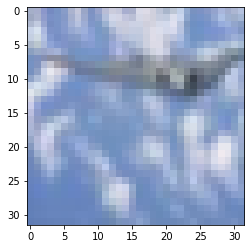

In [30]:
show_example(*dataset[100])

## traning and Validation (split)

In [32]:
import numpy as np

def split_indices(n, val_pct=0.1, seed=99):
    # determine size of validation set
    n_val = int(val_pct*n)

    # set the random seed ( for reproducibility)
    np.random.seed(seed)

    #Creat random permutation of 0 to n-1
    idxs = np.random.permutation(n)

    # pick first n_val indices for the validation set 
    return idxs[n_val:], idxs[:n_val]

In [37]:
val_pct = 0.2
rand_seed = 42   # udes for random no generator

train_indices, val_indices = split_indices(len(dataset), val_pct, rand_seed)
print(len(train_indices), len(val_indices))
print('sample validation indices:', val_indices[:9])

40000 10000
sample validation indices: [33553  9427   199 12447 39489 42724 10822 49498  4144]


In [38]:
from torch.utils.data.sampler import SubsetRandomSampler

In [39]:
from torch.utils.data.dataloader import DataLoader

In [40]:
batch_size  = 200

# traning data sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_d1 = DataLoader(dataset, 
                      batch_size,
                      sampler = train_sampler)
# validation data sampler and loader 

val_sampler = SubsetRandomSampler(val_indices)
val_d1 = DataLoader(dataset, 
                      batch_size,
                      sampler = val_sampler)


In [41]:
from torchvision.utils import make_grid

def show_batch(d1):
    for images, labels in d1:
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, 10).permute(1, 2, 0))   ## channels to the end
        break 


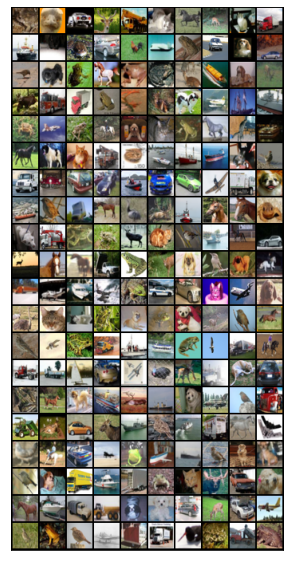

In [42]:
show_batch(train_d1)

## defining the CNN

In [43]:
import torch.nn as nn
import torch.nn.functional as F 

In [44]:
sample_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2,2)
)

In [46]:
for images, labels in train_d1:
    print('images_shape:', images.shape)
    out = sample_model(images)
    print('out_shape:', out.shape)
    break


images_shape: torch.Size([200, 3, 32, 32])
out_shape: torch.Size([200, 8, 16, 16])


In [48]:
?nn.Conv2d